In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

# ① 폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})


In [4]:
# 테이블형식으로 나옴. 리스트보다는 건들기 귀찮다.
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# sklearn의 load_iris를 사용하면 list로 나와 타겟과 피쳐 분리가 쉬워진다.
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
load_iris().data.shape

iris = load_iris().data

In [10]:
iris[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [ ]:
# reshpae (-1) -> 그자체 크기를 말하는거나 같음 (-1,1) 하면 1차원->2차원
X = iris[:,0].reshape(-1,1)

In [13]:
X.shape

(150, 1)

In [19]:
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [20]:
X.flatten()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [14]:
y = iris[:,2]

<Axes: >

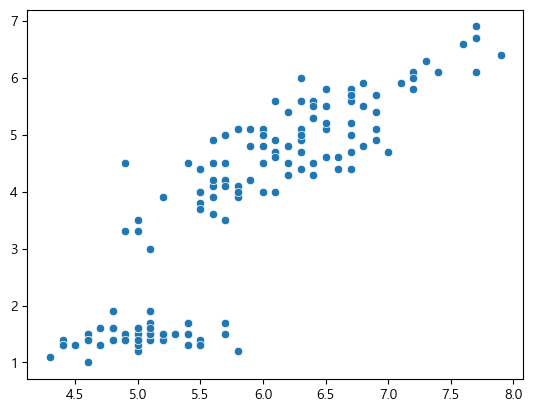

In [18]:
sns.scatterplot(x=X.flatten() ,y=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train: 80%, Test: 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train 세트: {len(X_train)}개")
print(f"Test 세트: {len(X_test)}개")

Train 세트: 120개
Test 세트: 30개


In [ ]:
# 선형 회귀 모델 생성 y = a₁x₁ + a₂x₂ + ... + b 형태
model = LinearRegression()

# 학습! 실제로 데이터를 보고 a 와 b 값을 찾는 단계
model.fit(X_train, y_train)

In [ ]:
# w와 b 확인
w = model.coef_[0]
b = model.intercept_

print(f" 학습 완료!")
print(f"가중치 w (기울기): {w:.3f}")
print(f"편향 b (절편): {b:.3f}")
print(f"찾은 식: y = {w:.3f}x + {b:.3f}")

 학습 완료!
가중치 w (기울기): 1.834
편향 b (절편): -6.927
찾은 식: y = 1.834x + -6.927


In [ ]:
y_pred = model.predict(X_test)

# MSE (Mean Squared Error) → 오차 제곱의 평균 (작을수록 좋음)
mse = mean_squared_error(y_test, y_pred) 

# R² (결정계수) → 모델이 데이터를 얼마나 설명하는가 (1에 가까울수록 좋음)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 0.5960765879745186
R2 Score: 0.8181245472591437


| 구분        | MSE          | R² Score    |
| --------- | ------------ | ----------- |
| **의미**    | 오차 크기 자체     | 모델의 설명력 비율  |
| **좋은 방향** | 0에 가까울수록 좋음  | 1에 가까울수록 좋음 |
| **단위**    | y의 제곱 단위     | 단위 없음 (비율형) |
| **직관성**   | 오차 크기 감지에 유리 | 모델 비교에 유리   |


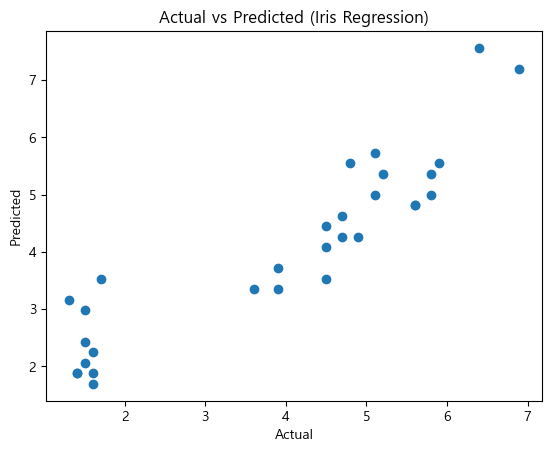

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Iris Regression)")
plt.show()


A: MSE=0.092, R²=0.954
B: MSE=1.000, R²=0.995


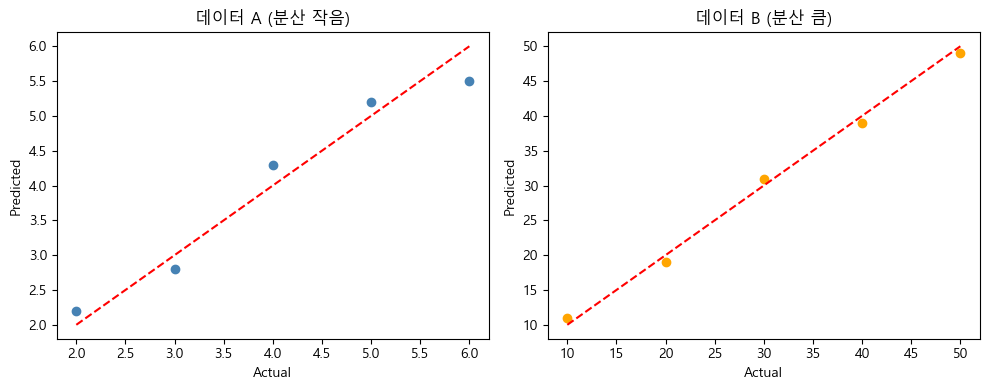

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ① 데이터 A: 값이 좁은 범위 (분산이 작음)
y_true_A = np.array([2, 3, 4, 5, 6])
y_pred_A = np.array([2.2, 2.8, 4.3, 5.2, 5.5])

# ② 데이터 B: 값이 넓은 범위 (분산이 큼)
y_true_B = np.array([10, 20, 30, 40, 50])
y_pred_B = np.array([11, 19, 31, 39, 49])

# MSE 계산 (둘 다 비슷하게 나옴)
mse_A = mean_squared_error(y_true_A, y_pred_A)
mse_B = mean_squared_error(y_true_B, y_pred_B)

# R² 계산
r2_A = r2_score(y_true_A, y_pred_A)
r2_B = r2_score(y_true_B, y_pred_B)

print(f"A: MSE={mse_A:.3f}, R²={r2_A:.3f}")
print(f"B: MSE={mse_B:.3f}, R²={r2_B:.3f}")

# 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(y_true_A, y_pred_A, color='steelblue')
axes[0].plot(y_true_A, y_true_A, 'r--')
axes[0].set_title("데이터 A (분산 작음)")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

axes[1].scatter(y_true_B, y_pred_B, color='orange')
axes[1].plot(y_true_B, y_true_B, 'r--')
axes[1].set_title("데이터 B (분산 큼)")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


In [31]:
df = pd.read_csv('train.csv')

df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [37]:
df_t = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,pd.NA)
df_t.isnull().sum()

Glucose            4
BloodPressure     30
SkinThickness    195
Insulin          318
BMI                7
Age                0
dtype: int64

In [44]:
df_t.dropna(inplace=True)
df_t.corr()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.078956
Age,0.342942,0.301791,0.182784,0.196610,0.078956,1.000000


In [45]:
X = df_t[['BloodPressure','SkinThickness','Insulin','BMI','Age']]

In [52]:
X = df_t.drop("Glucose", axis=1)
X

,BloodPressure,SkinThickness,Insulin,BMI,Age
0,60,33,192,24.0,33
3,88,41,170,45.3,26
4,66,36,200,38.1,21
5,50,32,88,31.0,26
6,54,25,100,25.2,23
...,...,...,...,...,...
636,110,24,240,45.4,54
637,90,33,29,26.8,43
638,62,41,480,40.7,21
643,74,25,293,34.9,30


In [55]:
y = df_t['Glucose']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()

In [66]:
model2 = PolynomialFeatures(2)

In [58]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
model.intercept_

np.float64(57.935561554277555)

In [60]:
y_pred = model.predict(X_test)

In [63]:
r2_score(y_test, y_pred)

0.24382127570689494

In [64]:
model.score(X_test, y_test)

0.24382127570689494

In [67]:
model2.fit(X_train,y_train)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [72]:
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [73]:
model2.fit(X_train,y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [74]:
model2.score(X_test,y_test)

0.2746694932220122